In [25]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import numpy as np


COLORS = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
        '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
        '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5')

font_dir = os.path.abspath('CMU Serif/custom')
font_paths = [
    os.path.join(font_dir, 'cmunrm_minus.ttf'),
    os.path.join(font_dir, 'cmunci_minus.ttf')
]

for font_path in font_paths:
    fm.fontManager.addfont(font_path)
    
fm._load_fontmanager(try_read_cache=False)

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False

In [26]:
def diff2(x_0, h, f):
    return (f(x_0 + h) - f(x_0 - h))/(2 * h)

In [29]:
def g1(x):
    return x * np.e**x

def g2(x):
    return x**2 * np.sin(3 * x)
        
def g3(x):
    return np.sin(np.pi / x)

[1.00000000e-16 1.45082878e-16 2.10490414e-16 3.05385551e-16
 4.43062146e-16 6.42807312e-16 9.32603347e-16 1.35304777e-15
 1.96304065e-15 2.84803587e-15 4.13201240e-15 5.99484250e-15
 8.69749003e-15 1.26185688e-14 1.83073828e-14 2.65608778e-14
 3.85352859e-14 5.59081018e-14 8.11130831e-14 1.17681195e-13
 1.70735265e-13 2.47707636e-13 3.59381366e-13 5.21400829e-13
 7.56463328e-13 1.09749877e-12 1.59228279e-12 2.31012970e-12
 3.35160265e-12 4.86260158e-12 7.05480231e-12 1.02353102e-11
 1.48496826e-11 2.15443469e-11 3.12571585e-11 4.53487851e-11
 6.57933225e-11 9.54548457e-11 1.38488637e-10 2.00923300e-10
 2.91505306e-10 4.22924287e-10 6.13590727e-10 8.90215085e-10
 1.29154967e-09 1.87381742e-09 2.71858824e-09 3.94420606e-09
 5.72236766e-09 8.30217568e-09 1.20450354e-08 1.74752840e-08
 2.53536449e-08 3.67837977e-08 5.33669923e-08 7.74263683e-08
 1.12332403e-07 1.62975083e-07 2.36448941e-07 3.43046929e-07
 4.97702356e-07 7.22080902e-07 1.04761575e-06 1.51991108e-06
 2.20513074e-06 3.199267

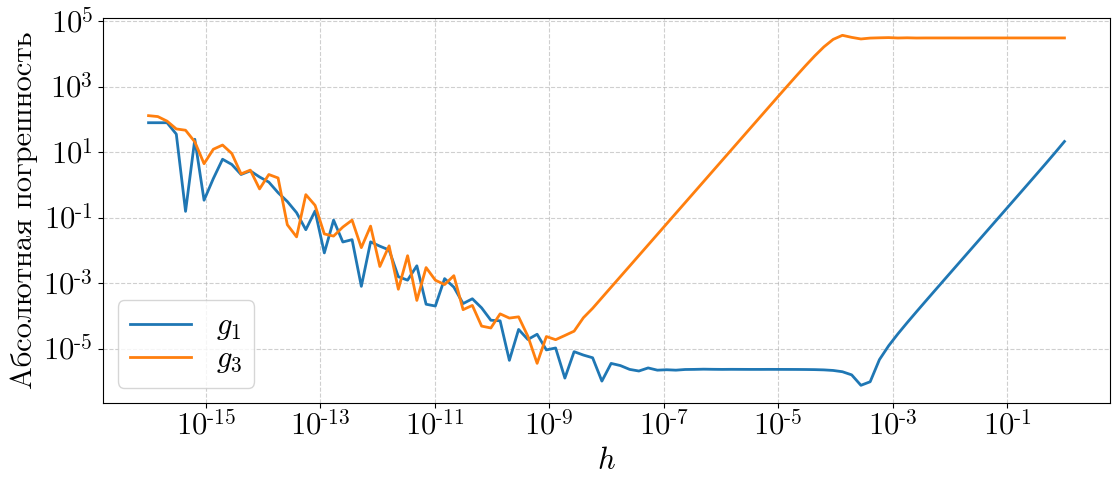

In [33]:
G1_DIFF_REF = 80.34215
G3_DIFF_REF = -31415.92654

h_set = np.logspace(-16, 0, 100)

print(h_set)

g1_abs_err = np.abs(np.array([diff2(3, h, g1) for h in h_set]) - G1_DIFF_REF)
g3_abs_err = np.abs(np.array([diff2(0.01, h, g3) for h in h_set]) - G3_DIFF_REF)

print(g1_abs_err)

fig, ax = plt.subplots(1, 1, figsize=(13, 5))


ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog(h_set, g1_abs_err, linewidth=2.0, label='$g_1$')
ax.loglog(h_set, g3_abs_err, linewidth=2.0, label='$g_3$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность')
ax.legend(labelspacing=0.1)

plt.show()
# plt.savefig('fig1.pdf')